# Gender Classification with 500 male images and 500 female images with 2 layers

In [1]:
'''image data generator tries to generate multiple data from 
single image like by shrinking,zooming/croping etc.'''
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential #we are using sequential model for classification.
'''Conv is used to exract featurs from images 
max pooling reduce the size of image without loosing it's feature  '''
from keras.layers import Conv2D, MaxPooling2D 
'''Activation function used to tell the network when to activate neuron
by using Dropout our network doesn't overfit
Flatten convert 2d image  into 1d vector
Dense is used to create hidden and output layer'''  
from keras.layers import Activation, Dropout,Flatten,Dense
''' backend tells us which channel is come first '''
from keras import backend as k
import numpy as np
from keras_preprocessing import image 

Using TensorFlow backend.


In [2]:
img_width, img_height =150,150
train_data_dir ='train/Train2'
test_data_dir ='test1/Test1'
nb_train_samples= 500
nb_test_saples=50
epochs= 50
batch_size =20 

In [4]:
#chech images are in right format or not
if k.image_data_format() == 'channels_first':
    input_shape = (3,img_width,img_height)
else:
    input_shape = (img_width,img_height,3)

train_datagen=ImageDataGenerator(rescale=1.0/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale =1.0/255.0)

In [5]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size,
                                                   class_mode='binary')

test_generator = test_datagen.flow_from_directory(train_data_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size,
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#  ---------------------- 2 layer model-------------------------------

In [6]:
model =Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)            

In [6]:
model.fit_generator(train_generator,
                   steps_per_epoch=nb_train_samples // batch_size,
                   epochs=epochs,
                   validation_data=test_generator,
                   validation_steps=nb_test_saples// batch_size)
model.save_weights('third_try.h5')

Epoch 1/50
25/25 [==============================] - 14s 569ms/step - loss: 0.7244 - accuracy: 0.5720 - val_loss: 0.6588 - val_accuracy: 0.6250
Epoch 2/50
25/25 [==============================] - 13s 508ms/step - loss: 0.6458 - accuracy: 0.6720 - val_loss: 0.5645 - val_accuracy: 0.6250
Epoch 3/50
25/25 [==============================] - 11s 427ms/step - loss: 0.6737 - accuracy: 0.6640 - val_loss: 0.3520 - val_accuracy: 0.9000
Epoch 4/50
25/25 [==============================] - 10s 396ms/step - loss: 0.5694 - accuracy: 0.7260 - val_loss: 0.3587 - val_accuracy: 0.8250
Epoch 5/50
25/25 [==============================] - 10s 394ms/step - loss: 0.5550 - accuracy: 0.7440 - val_loss: 0.3413 - val_accuracy: 0.8750
Epoch 6/50
25/25 [==============================] - 10s 381ms/step - loss: 0.5436 - accuracy: 0.7620 - val_loss: 0.5281 - val_accuracy: 0.9000
Epoch 7/50
25/25 [==============================] - 10s 387ms/step - loss: 0.4935 - accuracy: 0.7640 - val_loss: 0.3859 - val_accuracy: 0.8250

In [7]:
img_pred =image.load_img('test1/Test1/female/IMG_E8448.JPG',target_size= (150,150))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis=0)

[[3.9611172e-22]]
female


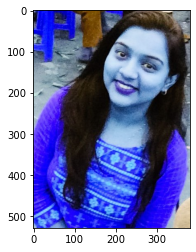

In [8]:
rslt =model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ='male'
else:
    prediction ='female'

print(prediction)
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('test1/Test1/female/IMG_E8448.JPG')
plt.imshow(img)
plt.show()

In [9]:
img_pred =image.load_img('test1/Test1/male/IMG_1557.JPG',target_size= (150,150))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis=0)

[[6.09336e-11]]
female


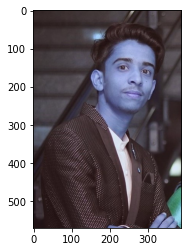

In [10]:
rslt =model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ='male'
else:
    prediction ='female'

print(prediction)
img = cv2.imread('test1/Test1/male/IMG_1557.JPG')
plt.imshow(img)
plt.show()